In [46]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

import seaborn as sns
sns.set_context('talk')

In [58]:
import os
os.chdir("/Users/Dell/Downloads/Austin")
raw=pd.read_csv('BSS.csv')
raw.head()

import datetime
raw[["datetime"]] = raw[["datetime"]].apply(pd.to_datetime)
print(raw)

                 datetime               membership  bike_id  checkout_id  \
0     2018-01-01 00:39:00                     year      709         2494   
1     2018-01-01 01:17:00                      day     1000         2494   
2     2018-01-01 05:05:00                      day      919         2539   
3     2018-01-01 09:17:00                     year      871         2563   
4     2018-01-01 09:31:00                     year      540         2499   
5     2018-01-01 10:19:00                      day       78         3293   
6     2018-01-01 10:20:00                      day      749         3293   
7     2018-01-01 10:55:00                      day      191         2566   
8     2018-01-01 11:26:00                      day      863         2572   
9     2018-01-01 11:27:00                      day      991         3660   
10    2018-01-01 11:28:00                      day      551         3660   
11    2018-01-01 11:31:00                      day      749         2563   
12    2018-0

In [59]:
MIN_DATE = '2018-01-01'
MAX_DATE = '2018-10-12'

In [60]:
print(raw.shape)

(48001, 6)


In [61]:
drop_columns = ["membership","bike_id","checkin_id"]

In [62]:
data = (raw.copy()
        .drop(drop_columns, axis=1)
        .rename({"datetime": "dt", "checkout_id": "station"}, axis=1))
data.head()

,dt,station,duration
0,2018-01-01 00:39:00,2494,6
1,2018-01-01 01:17:00,2494,416
2,2018-01-01 05:05:00,2539,1
3,2018-01-01 09:17:00,2563,8
4,2018-01-01 09:31:00,2499,2


In [64]:
max_bikes = data.groupby("station")["duration"].max()
max_bikes

station
1007     839
2494    1814
2495     864
2496     626
2497     730
2498    2640
2499    1246
2501    1176
2502    1341
2503     753
2504    4286
2537    3998
2538      57
2539     851
2540    2175
2541     133
2542    1883
2544     372
2547     792
2548     747
2549    1196
2552    3547
2561     404
2562     812
2563    1450
2565    6405
2566     777
2567    4265
2568     873
2569    1563
2570    1363
2571    2842
2572     720
2574    2894
2575    4898
2707    1949
2711    1029
2822     196
2823     759
3291     790
3292     723
3293     482
3377    1333
3390    1336
3513     842
3619    2052
3621     771
3635    2614
3660     670
3684    3674
3685     555
3686     762
3687    1125
Name: duration, dtype: int64

In [65]:
wrong_stations = max_bikes[max_bikes == 0].index.tolist()
wrong_stations

[]

In [66]:
well_station_mask = np.logical_not(data['station'].isin(wrong_stations))
data = data[well_station_mask]
print(data.shape)

(48001, 3)


In [70]:
df = (data.set_index("dt")
      .groupby("station")["duration"]
      .resample("1T")
      .mean()
      .bfill())

In [71]:
df = df.unstack(0)
df.head()

station,1007,2494,2495,2496,2497,2498,2499,2501,2502,2503,...,3390,3513,3619,3621,3635,3660,3684,3685,3686,3687
dt,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:39:00,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:40:00,NaN,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:41:00,NaN,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:42:00,NaN,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:43:00,NaN,416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
n_clusters = 3

In [73]:
df = df.fillna(method='bfill')

df = df.fillna(method='ffill')
df_norm = df / df.max()

In [74]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_norm.T)
label = pd.Series(kmeans.labels_)
label.groupby(label).count()

0    47
1     2
2     4
dtype: int64

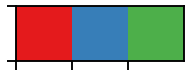

In [76]:
colors = sns.color_palette('Set1', n_clusters)
sns.palplot(colors)

In [77]:
import os
os.chdir("/Users/Dell/Downloads/Austin")

pd.DataFrame(kmeans.cluster_centers_).to_csv("BSS_clusters.csv", index=False)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  from ipykernel import kernelapp as app
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  from ipykernel import kernelapp as app
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  from ipykernel import kernelapp as app
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  from ipykernel import kernelapp as app
C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\Anaconda3

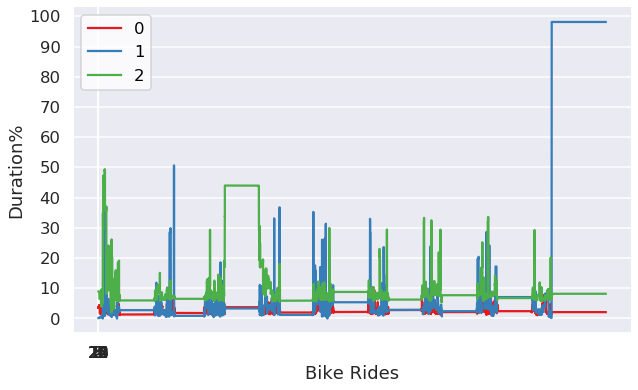

In [78]:
import matplotlib.pyplot as plt

with sns.axes_style("darkgrid", {'xtick.major.size': 8.0}):
    fig, ax = plt.subplots(figsize=(10,6))

for k, label, color in zip(kmeans.cluster_centers_, range(n_clusters), colors):
    plt.plot(100*k, color=color, label=label)
    
plt.legend()
plt.xlabel('Bike Rides')
plt.xticks(np.linspace(0, 24, 13))
plt.yticks(np.linspace(0, 100, 11))
plt.ylabel("Duration%")
sns.despine()
plt.savefig("Austin-pattern.png")

In [79]:
import os
os.chdir("/Users/Dell/Downloads/Austin")
locations=pd.read_csv('Stations.csv')
locations.head()

,lat,lon,name,stationid
0,30.27041,-97.75046,West & 6th St.,2537
1,30.26452,-97.77120,Barton Springs Pool,2572
2,30.27595,-97.74739,ACC - Rio Grande & 12th,2545
3,30.28480,-97.72756,Red River & LBJ Library,1004
4,30.26694,-97.74939,Nueces @ 3rd,1008


In [80]:
mask = np.logical_not(locations['stationid'].isin(wrong_stations))
locations = locations[mask]
locations.head()

,lat,lon,name,stationid
0,30.27041,-97.75046,West & 6th St.,2537
1,30.26452,-97.77120,Barton Springs Pool,2572
2,30.27595,-97.74739,ACC - Rio Grande & 12th,2545
3,30.28480,-97.72756,Red River & LBJ Library,1004
4,30.26694,-97.74939,Nueces @ 3rd,1008


In [81]:
dflabel = pd.DataFrame({"label": kmeans.labels_}, index=df.columns)
locations = locations.merge(dflabel, right_index=True, left_on='stationid')
locations.head()

,lat,lon,name,stationid,label
0,30.27041,-97.75046,West & 6th St.,2537,0
1,30.26452,-97.77120,Barton Springs Pool,2572,0
6,30.24891,-97.75019,South Congress & Elizabeth,2504,0
8,30.26217,-97.72743,Plaza Saltillo,2542,0
9,30.28576,-97.74181,UT West Mall @ Guadalupe,2548,0


In [82]:
locations["nom"] = locations['name'].str.replace("'", "&apos;")

In [83]:
import folium
# Austin (US) Position
position = [30.2672, 97.7431]
mp = folium.Map(location=position, zoom_start=13, tiles='cartodbpositron')
#mp = folium.Map(location=position, zoom_start=13)
hex_colors = colors.as_hex()

for _,row in locations.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        popup=row['nom'],
        color=hex_colors[row['label']],
        fill=True,
        fill_opacity=0.5,
        fill_color=hex_colors[row['label']]
    ).add_to(mp)

In [84]:
mp.save("Austin-map-n_clusters-{}.html".format(n_clusters))
mp